In [211]:
from fluidfoam.readpostpro import readforce
import matplotlib.pyplot as plt
from scipy import integrate
from sklearn.metrics import auc
import numpy as np
import math

## IMPORTANT NOTE ##
# need to run AllExtractRBM in a new terminal to get the sixDoFRigidBodyState file
# can do during simulation or after simulation is done

sol = './'
force = readforce(sol, time_name = 'mergeTime', namepatch="forces", name="force")
rbs = readforce(sol, time_name = 'mergeTime', namepatch="sixDoFRigidBodyState", name="sixDoFRigidBodyState")



C:\Users\myozi\AppData\Local\Temp\ipykernel_20904\3948775189.py:83: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  surge = integrate.cumtrapz(u, timeRBS, initial=0)*1000
C:\Users\myozi\AppData\Local\Temp\ipykernel_20904\3948775189.py:84: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  sway = integrate.cumtrapz(v, timeRBS, initial=0)*1000
C:\Users\myozi\AppData\Local\Temp\ipykernel_20904\3948775189.py:85: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  heave = integrate.cumtrapz(w, timeRBS, initial=0)*1000


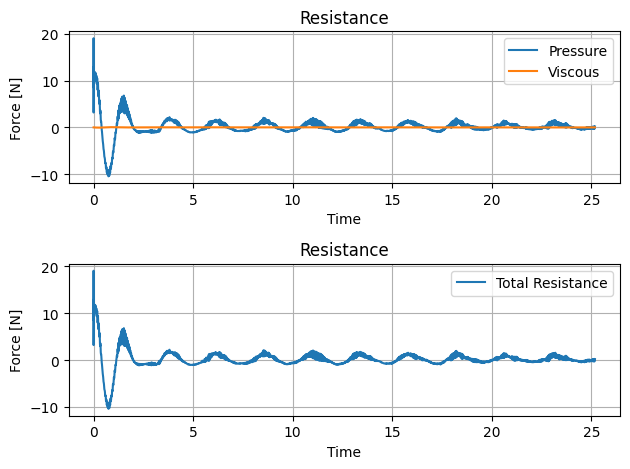

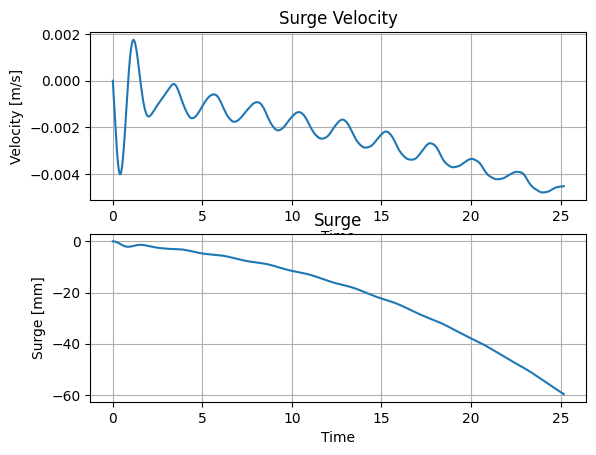

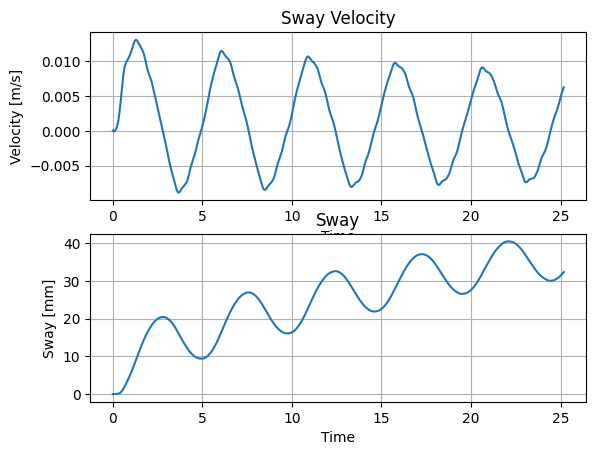

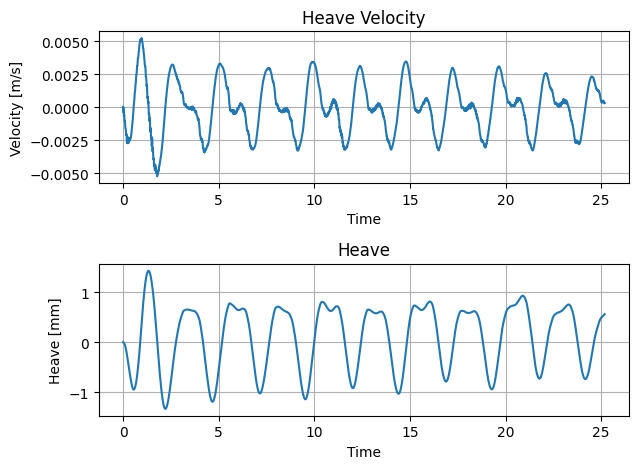

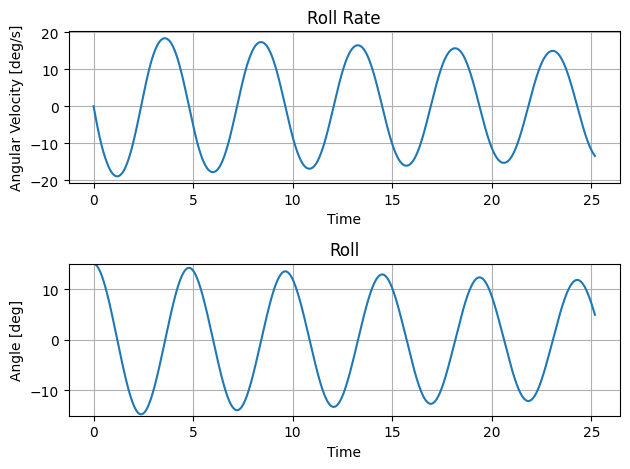

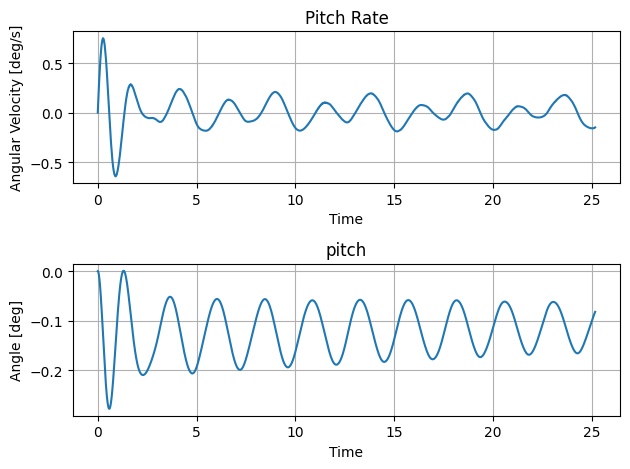

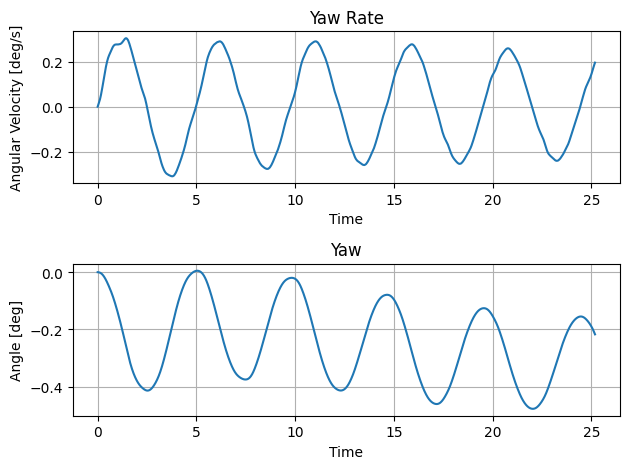

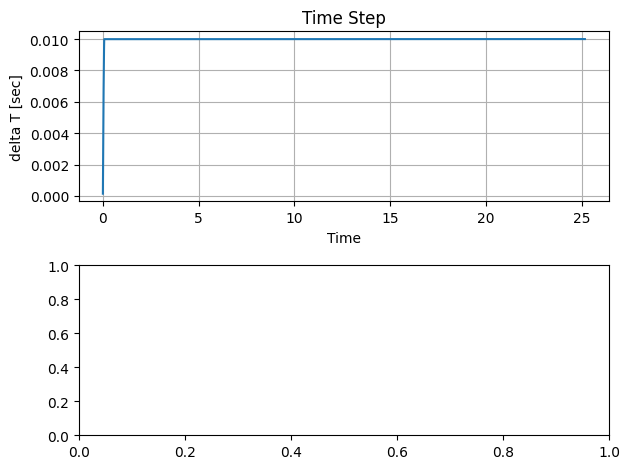

TIME: 25.18 sec
Final dt: 0.00999999999999801 sec
PX: 0.1952678 N
VX: 0.08765456124393076 N
TX: 0.1972666 N
Roll: -10.057243482940939 deg
Roll AUC: -10.057565928625959 deg
Pitch: 0.08237314054925056 deg
Pitch AUC: 0.21601756191308003 deg
Yaw: 0.2174496643038334 deg
Yaw AUC: 0.246291298487412 deg
Heave AUC: 0.5628549067238913 mm
Heave Integral: 0.5628549067238915 mm


In [212]:

## Plot the forces ##
fig, axs = plt.subplots(2, 1)

time = force[:,0]
dt = time[1:-1] - time[0:-2]
px = -force[:,4]
vx = -force[:,7]
tx = -force[:,1] # tx = (px + vx)

axs[0].plot(time, px, time, vx)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Force [N]')
axs[0].legend(['Pressure', 'Viscous'])
axs[0].set_title('Resistance')
# axs[0].set_ylim(-5,5)
axs[0].grid()

axs[1].plot(time, tx)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Force [N]')
axs[1].legend(['Total Resistance'])
axs[1].set_title('Resistance')
# axs[1].set_ylim(0,10)
axs[1].grid()

fig.tight_layout()

## Plot the rigid body state ##
# rbs = time, (r11, r12, r13, r21, r22, r23, r31, r32, r33), (u, v, w), (p, q, r)

timeRBS = rbs[:,0]

r11 = rbs[:,1]
r12 = rbs[:,2]
r13 = rbs[:,3]
r21 = rbs[:,4]
r22 = rbs[:,5]
r23 = rbs[:,6]
r31 = rbs[:,7]
r32 = rbs[:,8]
r33 = rbs[:,9]

# https://www.cfd-online.com/Forums/openfoam-post-processing/97312-how-extract-roll-angles-2d-floating-object.html
# Calculate trace
trace = r11 + r22 + r33

# Calculate scalar part s
s = 0.5 / np.sqrt(trace + 1)

# Calculate quaternion components
w = 0.25 / s
vx = (r32 - r23) * s
vy = (r13 - r31) * s
vz = (r21 - r12) * s

# Quaternion to matrix transformation
t11 = 2 * (w * vx - vy * vz)
t12 = w ** 2 - vx ** 2 - vy ** 2 + vz ** 2
s2 = 2 * (vx * vz + w * vy)
t31 = 2 * (w * vz - vx * vy)
t32 = w ** 2 + vx ** 2 - vy ** 2 - vz ** 2

# Conversion from quaternions to Euler angles
roll = np.arctan2(t11, t12)*180/math.pi  # Rolling
pitch = np.arcsin(s2)*180/math.pi         # Pitching
yaw = np.arctan2(t31, t32)*180/math.pi  # Yawing

# pitch = rbs[:,3]*180/math.pi # My guess

# sy = np.sqrt(r32**2 + r33**2)
# # Assuming no singularity
# roll = np.arctan2(r32, r33)*180/math.pi
# pitch = np.arctan2(-r31,sy)*180/math.pi
# yaw = np.arctan2(r21, r11)*180/math.pi

p = rbs[:,13]*180/math.pi
q = rbs[:,14]*180/math.pi
r = rbs[:,15]*180/math.pi

u = rbs[:,10]
v = rbs[:,11]
w = rbs[:,12]
surge = integrate.cumtrapz(u, timeRBS, initial=0)*1000
sway = integrate.cumtrapz(v, timeRBS, initial=0)*1000
heave = integrate.cumtrapz(w, timeRBS, initial=0)*1000



fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, u)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Velocity [m/s]')
axs[0].set_title('Surge Velocity')
# axs[0].set_ylim(-0.02,0.01)
axs[0].grid()

axs[1].plot(timeRBS, surge)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Surge [mm]')
axs[1].set_title('Surge')
# axs[1].set_ylim(-0.02,0.01)
axs[1].grid()

fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, v)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Velocity [m/s]')
axs[0].set_title('Sway Velocity')
# axs[0].set_ylim(-0.02,0.01)
axs[0].grid()

axs[1].plot(timeRBS, sway)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Sway [mm]')
axs[1].set_title('Sway')
# axs[1].set_ylim(-0.02,0.01)
axs[1].grid()

fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, w)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Velocity [m/s]')
axs[0].set_title('Heave Velocity')
# axs[0].set_ylim(-0.02,0.01)
axs[0].grid()

axs[1].plot(timeRBS, heave)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Heave [mm]')
axs[1].set_title('Heave')
# axs[1].set_ylim(-0.02,0.01)
axs[1].grid()
fig.tight_layout()

fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, p)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Angular Velocity [deg/s]')
axs[0].set_title('Roll Rate')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

axs[1].plot(timeRBS, -roll+15)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Angle [deg]')
axs[1].set_title('Roll')
axs[1].set_ylim(-15,15)
axs[1].grid()
fig.tight_layout()

fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, q)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Angular Velocity [deg/s]')
axs[0].set_title('Pitch Rate')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

axs[1].plot(timeRBS, pitch)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Angle [deg]')
axs[1].set_title('pitch')
axs[1].grid()
fig.tight_layout()

fig, axs = plt.subplots(2, 1)
axs[0].plot(timeRBS, r)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Angular Velocity [deg/s]')
axs[0].set_title('Yaw Rate')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

axs[1].plot(timeRBS, yaw)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Angle [deg]')
axs[1].set_title('Yaw')
axs[1].grid()
fig.tight_layout()

fig, axs = plt.subplots(2, 1)
axs[0].plot(time[0:-2], dt)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('delta T [sec]')
axs[0].set_title('Time Step')
# axs[0].set_ylim(-0.25,0.75)
axs[0].grid()

# axs[1].plot(time, -pitch)
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Angle [deg]')
# axs[1].set_title('pitch')
# axs[1].grid()

fig.tight_layout()
plt.show()

print('TIME:', time[-1], 'sec')
print('Final dt:' , time[-1]-time[-2], 'sec')

print('PX:', px[-1], 'N')
print('VX:', vx[-1], 'N')
print('TX:', tx[-1], 'N')

print('Roll:', -roll[-1], 'deg')
print('Roll AUC:', auc(timeRBS, p), 'deg')

print('Pitch:', -pitch[-1], 'deg')
print('Pitch AUC:', auc(timeRBS, q), 'deg')

print('Yaw:', -yaw[-1], 'deg')
print('Yaw AUC:', auc(timeRBS, r), 'deg')

print('Heave AUC:', auc(timeRBS, w)*1000, 'mm')
print('Heave Integral:', heave[-1], 'mm')